In [1]:
from glob import glob
import pandas as pd
from sklearn.model_selection import train_test_split

## Make stratified datasets
-> Each class has an exact test, val split.
-> Classes with more instances are undersampled to level imbalance.

In [2]:
SRC_DIR = "../data/train_images/train_images"
TARGET_DIR = "../data/train_images/stratified"

In [3]:
df_dict = {
    "label": [],
    "image": [],
}

for path in glob(f"{SRC_DIR}/**/*.jpg"):
    _, label, _ = path.split("\\")
    df_dict["label"].append(label)
    df_dict["image"].append(path)

In [4]:
df = pd.DataFrame(df_dict)

Nuber of labels: 200
Min amount of instances: 55
Max amount of instances: 385


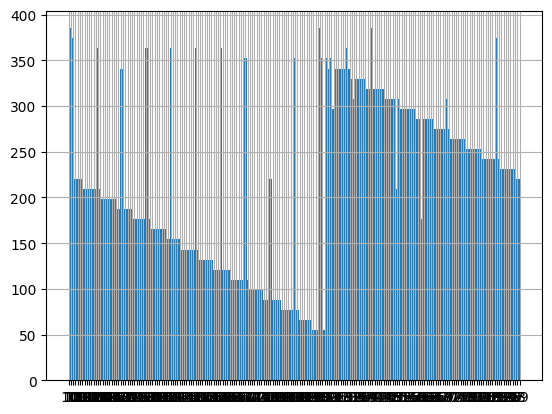

In [5]:
df["label"].hist(bins = len(df["label"].unique()))
print(f"Nuber of labels: {len(df['label'].unique())}")
print(f"Min amount of instances: {min(df['label'].value_counts())}")
print(f"Max amount of instances: {max(df['label'].value_counts())}")

In [8]:
TO_TAKE = 150  # number of instances to take for the stratified fold
stratified_df = pd.DataFrame({
    "label": [],
    "image": [],
})

In [9]:
for label in df["label"].unique():
    target_df = df[df["label"] == label]
    if len(target_df) > TO_TAKE:
         target_df = target_df.sample(n=TO_TAKE)
    stratified_df = pd.concat([stratified_df, target_df])

<Axes: >

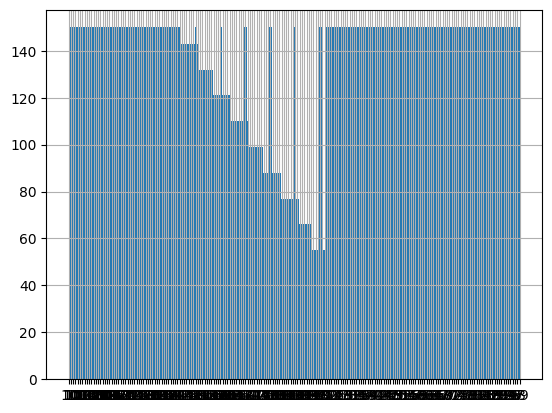

In [10]:
stratified_df["label"].hist(bins = len(df["label"].unique()))

In [11]:
stratified_df.to_csv("../data/train_images_stratified.csv")

In [12]:
stratified_train_df, stratified_val_df = train_test_split(stratified_df, test_size=0.15, random_state=42, stratify=stratified_df["label"])

In [13]:
stratified_train_df.to_csv("../data/train_ds_images_stratified.csv")
stratified_val_df.to_csv("../data/val_ds_images_stratified.csv")